<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/dave-updates/code/dave-Sentence-Embedding-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import spacy
from sklearn.cluster import KMeans

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col='ix')
# train['lemmatized_text'] = train['lemmatized_text'].fillna('')
train['lemmatized_text'] = train['lemmatized_text'].astype(str)

In [269]:
sample_df = train.groupby('label').apply(lambda x: x.sample(2500, random_state=99))

In [270]:
sample_df.label.value_counts()

0    2500
1    2500
Name: label, dtype: int64

In [239]:
nlp = spacy.load("en_core_web_sm")

In [271]:
sample_df['embedding'] =  (sample_df['lemmatized_text']
                           .apply(lambda doc: nlp(doc).vector))

In [272]:
X = pd.DataFrame([x for x in sample_df['embedding']])

In [276]:
km = KMeans(n_clusters=2, random_state=99)
km.fit(X)

KMeans(n_clusters=2, random_state=99)

In [277]:
km.labels_.

(5000,)

In [278]:
sample_df['cluster'] = km.labels_

In [279]:
np.bincount(km.labels_)

array([ 226, 4774])

In [280]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [281]:
X_std = StandardScaler().fit_transform(X)

In [282]:

X_pca = PCA(n_components=2).fit_transform(X_std)

In [283]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


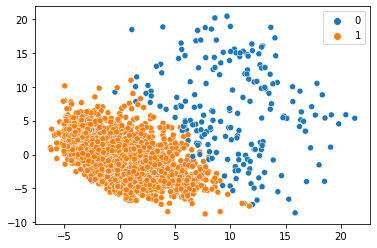

In [284]:
sns.scatterplot(X_pca[:,0],
                X_pca[:,1],
                hue=km.labels_)

In [289]:
sample_df.reset_index()

original_text  \
label ix                                                          
0     256892  He studied art in Berlin , Essen , and Munich ...   
      302461  There are paw prints of cave bears . There are...   
      336641  The album also won the band a 2003 Swedish Gra...   
      336467                      Communist Hungary , 1946-1989   
      413140  Both his teaching and his textbook were instru...   
...                                                         ...   
1     131267                       XboxGame Boy AdvanceGameCube   
      101928                         Los Toros -LRB- D.M. -RRB-   
      190118  Over 50 booksellers from around Australia set ...   
      151061  In most cases , the shires were named after th...   
      172708  After World War II , he studied law and econom...   

                                                lemmatized_text  \
label ix                                                          
0     256892  he study art in berlin essen and munich before...   
      302461  there be paw print of cave bear there be also ...   
      336641  the album also win the band a 2003 swedish gra...   
      336467                         communist hungary 19461989   
      413140  both he teach and he textbook be instrumental ...   
...                                                         ...   
1     131267                       xboxgame boy advancegamecube   
      101928                                los toro lrb dm rrb   
      190118  over 50 bookseller from around australia set u...   
      151061  in most case the shire be name after they shir...   
      172708  after world war ii he study law and economics ...   

              d_chall_score   aoa_mean  aoa_min  aoa_max  conc_rating_mean  \
label ix                                                                     
0     256892       8.097500   5.320769     2.89    12.22          2.663077   
      302461       1.780475   5.568750     3.58    10.71          2.933333   
      336641       6.714850   5.029231     2.89     7.74          2.855833   
      336467      15.938800  13.220000    13.22    13.22          3.500000   
      413140       8.356977   6.015652     2.89    11.84          2.730909   
...                     ...        ...      ...      ...               ...   
1     131267      10.675467   3.670000     3.67     3.67          4.760000   
      101928      16.038000   0.000000     0.00     0.00               NaN   
      190118       6.156133   5.175714     2.92     9.79          2.902143   
      151061       8.577292   6.425789     3.68    10.92          2.432778   
      172708       9.482200   6.353333     3.69    12.30          2.508500   

              conc_rating_min  conc_rating_max  num_lemmas  label  \
label ix                                                            
0     256892             1.33             4.92        20.0      0   
      302461             1.43             4.96        16.0      0   
      336641             1.43             4.91        16.0      0   
      336467             3.50             3.50         3.0      0   
      413140             1.43             4.93        27.0      0   
...                       ...              ...         ...    ...   
1     131267             4.76             4.76         3.0      1   
      101928              NaN              NaN         5.0      1   
      190118             1.43             4.64        18.0      1   
      151061             1.33             4.64        26.0      1   
      172708             1.43             4.65        32.0      1   

                                                      embedding  cluster  
label ix                                                                  
0     256892  [0.018231928, 0.4154876, 0.7377034, -0.2962893...        1  
      302461  [0.12793973, 0.08198082, 0.033817958, -0.48279...        1  
      336641  [0.5794473, 0.06901185, 0.021388948, 0.0367541...        1  
      336467  [0.6

In [93]:
np.mean(vecs, axis=1)

array([-0.00546921, -0.00127675], dtype=float32)